# 1. Introduction to Reinforcement Learning
### 1.1 Agents, Rewards, and Actions

We can set up an $\text{Arm}$ object, and assign it a reward value, $R$, later.

In [2]:
class Arm():
    def __init__(self, reward):
        self._reward = reward

We can also define our $\text{Agent}$ which is going to pull the $\text{Arm}$ to receive the reward and keep track of a running total.

In [3]:
class Agent():
    def __init__(self):
        self._total_reward = 0
    def pull_arm(self, arm):
        self._total_reward += arm._reward
        return arm._reward

We're going to set up our $\text{Arm}$ with a reward of 5, i.e., $R=5$.

In [4]:
arm = Arm(5)
agent = Agent()

Our $\text{Agent}$ pulls the arm and receives a reward of $5$!

In [5]:
agent.pull_arm(arm)

5

Our $\text{Agent}$ pulls the arm five more times for a total reward of $6 \times 5 = 30$. 

In [6]:
for _ in range(5): 
    agent.pull_arm(arm)
agent._total_reward

30

What if we have multiple $\text{Arms}$ with different reward values?

We set up five different arms: 
- $\text{Arm 1}:\quad R=10$
- $\text{Arm 2}:\quad R=5$
- $\text{Arm 3}:\quad R=-5$
- $\text{Arm 4}:\quad R=20$
- $\text{Arm 5}:\quad R=-10$

This defines our *action space*, $A$, which is represented as a *set of actions*: 
$$A = \set{\text{Arm 1, Arm 2, Arm 3, Arm 4, Arm 5}}$$

In [7]:
arm_1 = Arm(10)
arm_2 = Arm(5)
arm_3 = Arm(-5)
arm_4 = Arm(20)
arm_5 = Arm(-10)

arms = [arm_1, arm_2, arm_3, arm_4, arm_5]

Recall our $\text{Agent}$ is a reward maximiser, so we can simply instruct it to choose the $\text{Arm}$ that offers the **highest reward**. 

We do this by calling the $\text{max}$ operator. The $\text{key}$ parameter tells $\text{max}$ how to compare elements in $\text{arms}$, and the [lambda function](https://www.w3schools.com/python/python_lambda.asp) $\text{lambda arm:arm.\_reward}$ extracts the $\text{\_reward}$ attribute from each $\text{arm}$ object so that the $\text{max}$ function can determine which has the highest value. This ensures that our $\text{Agent}$ will always select the most rewarding option.

In [8]:
class Agent():
    def __init__(self):
        self._total_reward = 0
    def pull_arm(self, arms):
        best_arm = max(arms, key=lambda arm:arm._reward)
        self._total_reward += best_arm._reward
        return best_arm._reward

The $\text{Agent}$ picks the $\text{Arm}$ that offers the highest reward. It's going to select the **most rewarding action** *every single time*. This is what is called **greedy selection**, where the $\text{Agent}$ will always select the **most rewarding action** it knows.  

In [9]:
del agent

agent = Agent()
agent.pull_arm(arms)

20

## Unknown Rewards
So far we have seen how an $\text{Agent}$ can take the optimal **action** based on **known rewards**. This is straightforward - we select the action with the highest reward every time. 

What happens if the rewards aren't known ahead of time? Usually, rewards are sampled from **unknown distribution**, and the $\text{Agent}$ will has to trial different actions to discover the most rewarding ones.

#### Reward Distributions
In practice, reward distributions can take any shape.

For example, a reward distribution for an action *could* look something like any of the ones below: 
- **Distribution 1**: Most of the time we take an action, we'll get a reward of $0$. Higher rewards are uncommon.
- **Distribution 2**: Rewards are well distributed - sometimes we'll get positive rewards, sometimes we won't get any reward, sometimes we'll get negative rewards. 
- **Distribution 3**: We have a fairly equal chance of receiving positive and negative rewards of the same magnitude.
- **Distribution 4**: Rewards follow a normal distribution centered around $0$. Sometimes we'll get a positive reward, sometimes negative. 

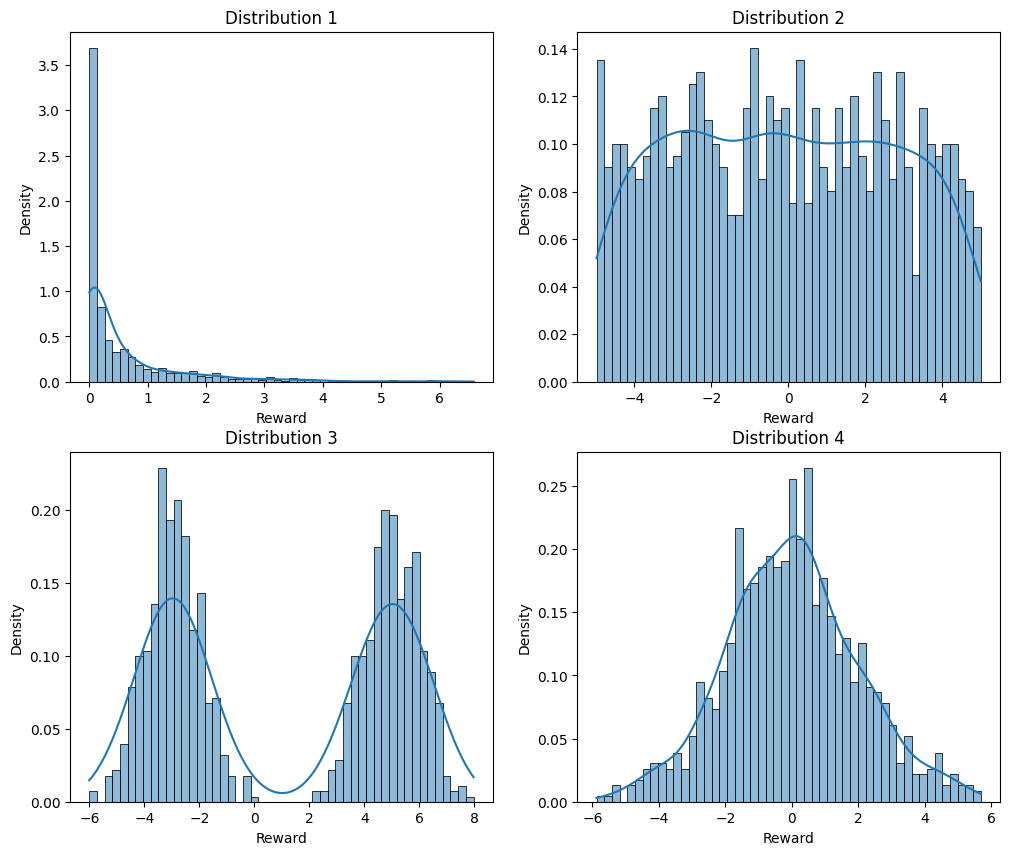

In [10]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

np.random.seed(0)

samples_left_skewed = np.random.beta(a=0.3, b=5, size=1000) * 10
samples_uniform = np.random.uniform(-5, 5, 1000)
samples_multimodal = np.concatenate([np.random.normal(-3, 1, 500), np.random.normal(5, 1, 500)])
samples_normal = np.random.normal(0, 2, 1000)

samples = [
    (samples_left_skewed, 'Distribution 1'), 
    (samples_uniform, 'Distribution 2'),
    (samples_multimodal, 'Distribution 3'), 
    (samples_normal, 'Distribution 4')
]

fig, axes = plt.subplots(2, 2, figsize=(12,10))

for ax, (data, title) in zip(axes.flatten(), samples):
    sns.histplot(data, bins=50, kde=True, stat='density', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Reward')
    ax.set_ylabel('Density')
    ax.grid = True

plt.show()

## Expected Rewards
Because we're dealing with unknowns, it's no longer appropriate to define a reward, for example, as $R=5$.

Instead we introduce a new concept: the **expected reward**, $\mathbb{E}(R)$. Because we're usually describing the expected reward given an action, we describe that mathematically as $\mathbb{E}(R |A= a)$ (where $A=a$ means that $a$ is chosen from the action space by the agent).

We can use the expected reward of an action as a measure of how 'good' it is. Formally, in reinforcement learning, this is known as the 'quality' of an action, denoted by $q^*(a)$, and more commonly known as the **Action-Value Function**. 

Put simply, the action-value function is **the expected reward for taking a specific action $a$**: 
$$q^*(a)=\mathbb{E}[R|A=a]$$

Because the true expected reward, $q^*(a)$, is unknown to us, we **must estimate this value by sampling from its distribution** over time. We represent **our estimate** using the notation $q(a)$. 

Imagine you were playing a single arm, $a$. The arm, unknown to you, has a fixed probability $0.1$ of dispensing a reward of $1$. 

In [11]:
probability = 0.1
reward = 1

As you begin to play arm $a$, your expectation of reward fluctuates significantly. Perhaps you're lucky and receive a reward for each of your first three plays. Your *expectation of reward* is high, and you over-estimate the arm's true reward potential. Over time, the more you play, your expectation of reward for arm $a$, $q(a)$, converges **to the true (expected) reward**, i.e., it converges towards $q^*(a)$. 

We see this play out in the graph below: the expectation fluctuates widely in the early stages, but as the number of plays increases, the expectation stabilises and converges to the true value.

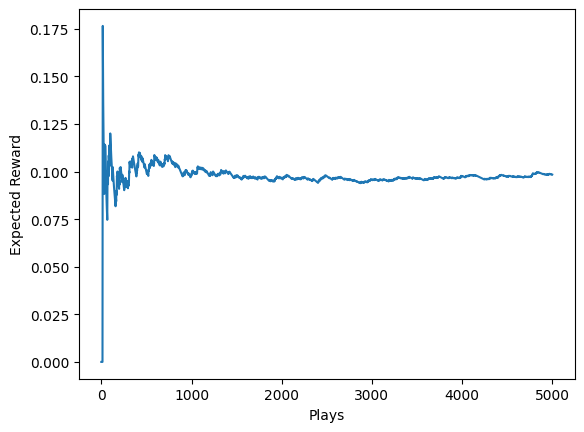

In [12]:
expected_reward = 0
expected_rewards = []
rewards = []
n_plays = 0

np.random.seed(0)

for _ in range(5000): 
    n_plays += 1
    if(np.random.rand() > probability):
        rewards.append(0)
        expected_reward = expected_reward + (1/n_plays) * (0 - expected_reward)
    else:
        rewards.append(reward)
        expected_reward = expected_reward + (1/n_plays) * (reward - expected_reward)
    expected_rewards.append(expected_reward)
    
plt.xlabel('Plays')
plt.ylabel('Expected Reward')
plt.plot(expected_rewards)

Our $\text{Agent}$ follows the same principle in deciding which $\text{Arm}$ is best: as it plays, it updates its belief about **how good an action is based on the reward it receives**. 

#### Defining our reward distribution

As described earlier, as the $\text{Agent}$ plays, it is given rewards sampled from **unknown distributions** and uses this information to learn the **value of an action** (the action-value function!), $q(a)$. 

For our purposes, we follow Sutton & Barto in defining new reward distributions for each $\text{Arm}$ as follows: 
- Each arm has a reward distribution modeled as a **Gaussian (normal) distribution** parameterised by unit variance (i.e., $\sigma^2=1$) and a **randomly sampled expected value (mean)**.
- We randomly sample the **expected reward** from a Gaussian distribution with mean zero and unit variance (standard normal distribution), i.e., $q(a)\sim\mathcal{N}(0,1)$. 
- This means that the reward offered by our arm is given as $R\sim\mathcal{N}(q(a),1)$. 

For each arm, we define an **expected reward** by sampling from a standard normal distribution.
$$q(a)\sim\mathcal{N}(0,1)$$

In [13]:
np.random.seed(0)
expected_reward = np.random.normal(0, 1)
expected_reward

1.764052345967664

We use this expected reward to parameterise the **reward distribution** for our arm. We will sample rewards from the Gaussian distribution shown below (where $q(a)$ is the mean of the distribution and the variance is $1$). 
$$R\sim\mathcal{N}(q(a), 1)$$

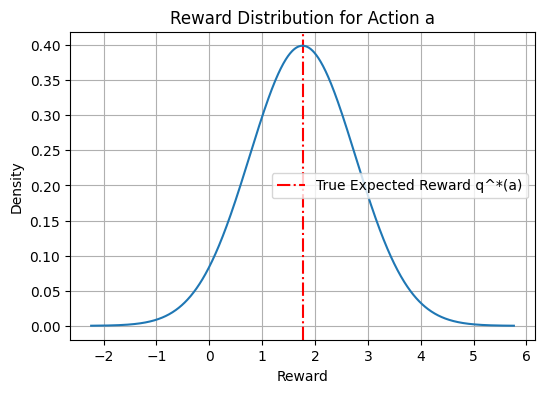

In [29]:
x = np.linspace(expected_reward - 4, expected_reward + 4, 1000)
pdf = (1 / np.sqrt(2 * np.pi)) * np.exp(-(x-expected_reward)**2 / 2)

plt.figure(figsize=(6,4))
plt.xlabel('Reward')
plt.ylabel('Density')
plt.title('Reward Distribution for Action a')
plt.axvline(x=expected_reward, c='red', linestyle='-.', label='True Expected Reward q^*(a)')
plt.grid()
plt.legend()
plt.plot(x, pdf)

### The K-Armed Bandit

We're going to introduce the $\text{Bandit}$ class. Think of the $\text{Bandit}$ like a slot machine, where we pull an arm and it offers us a reward randomly sampled from an unknown distribution. The $\text{Bandit}$ can have many arms, each with a different **reward distribution**.  

The $\text{Bandit}$ class initialises $\text{n\_arms}$ number of $\text{Arm}$ objects each with expected reward $q(a)\sim\mathcal{N}(0,1)$, as explained above.

In [15]:
np.random.seed(0)

class Bandit():
    def __init__(self, n_arms):
        self._n_arms = n_arms
        self.arms = [Arm(np.random.normal(0,1)) for _ in range(n_arms)]
        
    def play_arm(self, n_arm: int):
        return self.arms[n_arm].pull()

Each $\text{Arm}$ object is now given a $\text{pull}$ method which returns a reward sampled from a Gaussian distribution parameterised by our expected reward (action value) and unit variance, $R\sim\mathcal{N}(q(a),1)$ (just like the distribution we saw above, but with an unknown expected reward).

In [16]:
np.random.seed(0)

class Arm(): 
    def __init__(self, expected_value):
        self._expected_value = expected_value
        self._variance = 1

    def pull(self):
        return np.random.normal(self._expected_value, self._variance)

We update our $\text{Agent}$ with a dictionary to keep track of the **expected reward for each action**. We aim to learn these by playing many times and updating the value with the new information we receive.

We can intuively derive this update rule by considering that at each play the expected value is equal to the **sum of rewards divided by the number of plays**, or the **average reward per play**.

This can be given by taking the sample mean: 
$$q(a)=\frac{\sum_{i=1}^n R_i}{n}$$
where $q(a)$ is the action-value function, $R_i$ is the reward given for each play $i$, and $n$ is the total number of plays. 

The above method requires storing and summing over the history of all rewards at every step and can more easily (and with less computational expense) be updated by: 
$$q(a)\leftarrow q(a)+\frac{R-q(a)}{n}$$
where $R$ is the reward from the current play and $n$ is the number of plays.
A derivation of this formula can be found in Sutton & Barto, p.31.  

As our $\text{Agent}$ plays, it will learn the **true expected reward** ($q(a)$) for an action over time.

Remember, the $\text{Agent}$ selects an action based on the highest known reward.

In [17]:
class Agent():
    def __init__(self, n_arms):
        self._expected_rewards = {i: [0,0] for i in range(n_arms)}
        self._average_reward = [0]
        self._n_arms = n_arms
    
    def play(self, bandit):
        selected_arm = max(self._expected_rewards, key=lambda arm:self._expected_rewards[arm][1])

        reward = bandit.play_arm(selected_arm)

        arm_timesplayed = self._expected_rewards[selected_arm][0]
        arm_expectedvalue = self._expected_rewards[selected_arm][1]

        arm_timesplayed += 1
        arm_expectedvalue = arm_expectedvalue + ((1 / arm_timesplayed) * (reward - arm_expectedvalue))
        self._expected_rewards[selected_arm] = [arm_timesplayed, arm_expectedvalue]

        self._average_reward.append(self._average_reward[-1] + ((1 / len(self._average_reward) * (reward - self._average_reward[-1]))))
        

Let's put it into action. We first initialise our classes (we don't need $\text{Arm}$ - $\text{Bandit}$ handles that).

In [18]:
del agent

n_arms = 5

agent = Agent(n_arms=n_arms)
bandit = Bandit(n_arms=n_arms)

Our agent plays 100 times, taking a **greedy** approach - each time it is selecting the **highest known reward**. 

Can you consider why this might be problematic?

In [19]:
for _ in range(100):
    agent.play(bandit)

Let's take a look at what our $\text{Agent}$ has learned about the expected reward of each action by taking a look inside the $\text{\_expected\_rewards}$ dictionary.

The $\text{Agent}$ has only learned the expected reward for only *one* $\text{Arm}$. 

Consider what has happened here: 
- The $\text{Agent}$ assigns each $\text{Arm}$ an expected reward (action value), $q(a)$, of $0$, i.e.: $$\text{Expected Rewards}=[0,0,0,0,0]$$
- The $\text{max}$ operator selects the corresponding action of the first occurrence of the *maximum value*, i.e., it will select $\text{Arm 1}$. 
- The $\text{Agent}$ receives a randomly sampled reward, which happens to be positive, and updates its expected reward: $$\text{Expected Rewards}=[1.7,0,0,0,0]$$
- On the next play, the $\text{max}$ operator selects the corresponding action of the maximum expected reward, i.e., it will select $\text{Arm 1}$ again. 
- The agent will continue to select the same arm to play each and every time because it has the **highest known expected reward**. 

In [20]:
agent._expected_rewards

{0: [100, 1.7419581736289476], 1: [0, 0], 2: [0, 0], 3: [0, 0], 4: [0, 0]}

## Exploitation and Exploration
This is a good time to introduce two fundamental concepts in reinforcement learning: **exploration** and **exploitation**. 

We have just seen a case of **exploitation** - where the $\text{Agent}$ continues to play the highest-reward action it knows. But what if $\text{Arm 2}$ or $\text{Arm 3}$ have a higher expected reward? With a **greedy** approach, our $\text{Agent}$ will never learn to exploit these. 

This necessitates the introduction of **exploration**. With probability $\epsilon$, the $\text{Agent}$ will explore different actions, allowing it to learn the reward distribution for each arm and hopefully find one which offers a higher expected reward. In contrast to a greedy approach, where the $\text{Agent}$ takes the most rewarding action *every* time, this is called an **$\epsilon$-greedy** approach, where the $\text{Agent}$ takes a greedy action with probability $1-\epsilon$, and a random action with probability $\epsilon$.

We update our $\text{Agent}$ as follows:
- We introduce a parameter, $\text{epsilon}$, to denote the probability of exploration. 
- With probability $\text{epsilon}$ the $\text{Agent}$ will randomly select an arm to pull. 

In [21]:
class Agent():
    def __init__(self, epsilon, n_arms):
        self._epsilon = epsilon
        self._expected_rewards = {i: [0,0] for i in range(n_arms)}
        self._average_reward = [0]
        self._total_reward = 0
        self._cumulative_reward = [0]
        self._n_arms = n_arms
    
    def play(self, bandit: Bandit):
        if(np.random.rand() > self._epsilon):
            selected_arm = max(self._expected_rewards, key=lambda arm:self._expected_rewards[arm][1])
        else:
            selected_arm = np.random.randint(0, bandit._n_arms)

        reward = bandit.play_arm(selected_arm)

        arm_timesplayed = self._expected_rewards[selected_arm][0]
        arm_expectedvalue = self._expected_rewards[selected_arm][1]

        arm_timesplayed += 1
        arm_expectedvalue = arm_expectedvalue + ((1 / arm_timesplayed) * (reward - arm_expectedvalue))
        self._expected_rewards[selected_arm] = [arm_timesplayed, arm_expectedvalue]

        self._average_reward.append(self._average_reward[-1] + ((1 / len(self._average_reward) * (reward - self._average_reward[-1]))))
        self._total_reward += reward
        self._cumulative_reward.append((self._cumulative_reward[-1] + reward))


We initialise our separate $\text{Agents}$ with different levels of $\text{epsilon}$. 

In [22]:
del agent

agent = Agent(n_arms=n_arms, epsilon=0)
agent_05 = Agent(n_arms=n_arms, epsilon=0.5)
agent_01 = Agent(n_arms=n_arms, epsilon=0.1)

And play 100 times with each

In [23]:
for _ in range(100):
    agent_05.play(bandit)
    agent_01.play(bandit)
    agent.play(bandit)

We can see what expected reward they've learned for each arm, i.e., what values of $q(a)$ it has learned. 

In [24]:
print(f"Epsilon = 0: {agent._expected_rewards}")
print(f"Epsilon = 0.1: {agent_01._expected_rewards}")
print(f"Epsilon = 0.5: {agent_05._expected_rewards}")

Epsilon = 0: {0: [100, 1.657512660555131], 1: [0, 0], 2: [0, 0], 3: [0, 0], 4: [0, 0]}
Epsilon = 0.1: {0: [34, 1.791872221488904], 1: [2, -0.19628709815943374], 2: [0, 0], 3: [58, 2.3246732016030287], 4: [6, 2.008768589533556]}
Epsilon = 0.5: {0: [23, 1.6543480080322868], 1: [11, 0.47894406706998965], 2: [10, 0.8911313902710347], 3: [35, 2.3988394985915753], 4: [21, 2.126174387451031]}


And we can compare these to the actual expected values.

In [25]:
actual_rewards = []
for i, arm in enumerate(bandit.arms):
    print(f"Expected reward for Arm {i+1} : {arm._expected_value}")
    actual_rewards.append(arm._expected_value)

Expected reward for Arm 1 : 1.764052345967664
Expected reward for Arm 2 : 0.4001572083672233
Expected reward for Arm 3 : 0.9787379841057392
Expected reward for Arm 4 : 2.240893199201458
Expected reward for Arm 5 : 1.8675579901499675


We can also visualise how well each agent has learned the true expected reward for each arm. 

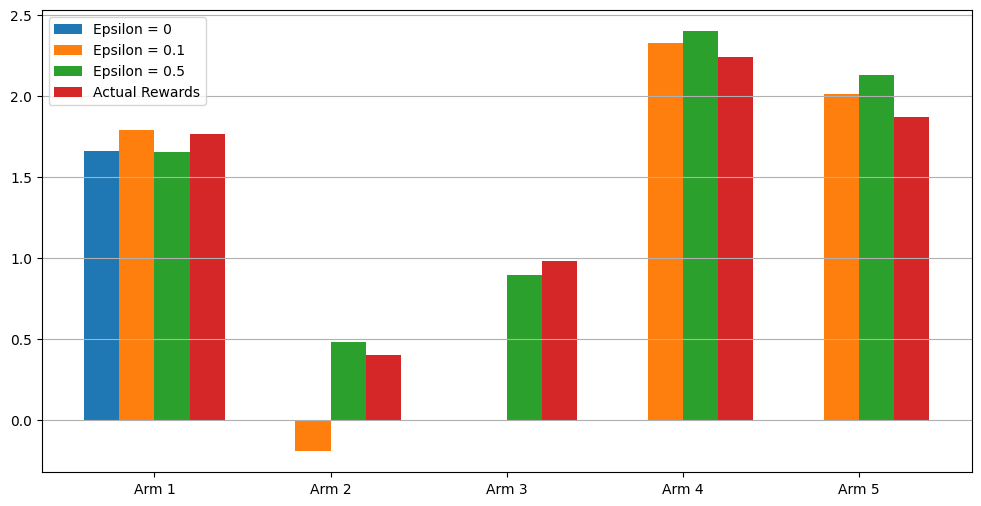

In [26]:
learned_0 = [v[1] for v in agent._expected_rewards.values()]
learned_01 = [v[1] for v in agent_01._expected_rewards.values()]
learned_05 = [v[1] for v in agent_05._expected_rewards.values()]

n = len(learned_0)
indices = np.arange(n)
bar_width = 0.2

plt.figure(figsize=(12,6))

plt.bar(indices-1.5 * bar_width, learned_0, bar_width, label='Epsilon = 0')
plt.bar(indices-0.5 * bar_width, learned_01, bar_width, label='Epsilon = 0.1')
plt.bar(indices+0.5 * bar_width, learned_05, bar_width, label='Epsilon = 0.5')
plt.bar(indices+1.5 * bar_width, actual_rewards, bar_width, label='Actual Rewards')

plt.xticks(indices, [f"Arm {i+1}" for i in range(n)])
plt.legend()
plt.grid(axis='y')

We can also visualise the average reward the agent receives over time, and the total reward it has received after playing $100$ times. 

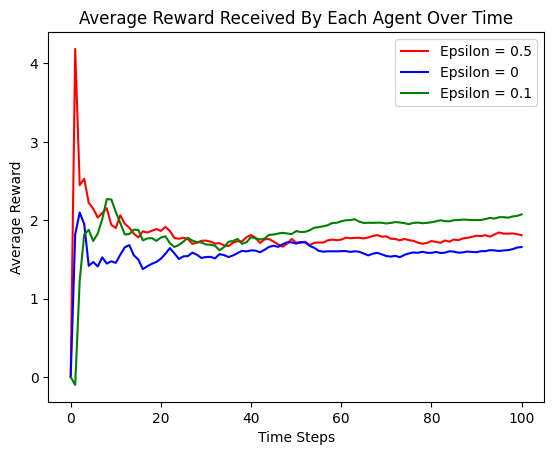

In [27]:
import matplotlib.pyplot as plt

time_steps = [i for i in range(101)]
plt.plot(time_steps, agent_05._average_reward, c='red', label='Epsilon = 0.5')
plt.plot(time_steps, agent._average_reward, c='blue', label='Epsilon = 0')
plt.plot(time_steps, agent_01._average_reward, c='green', label='Epsilon = 0.1')
plt.xlabel("Time Steps")
plt.ylabel("Average Reward")
plt.title("Average Reward Received By Each Agent Over Time")
plt.legend()
plt.show()

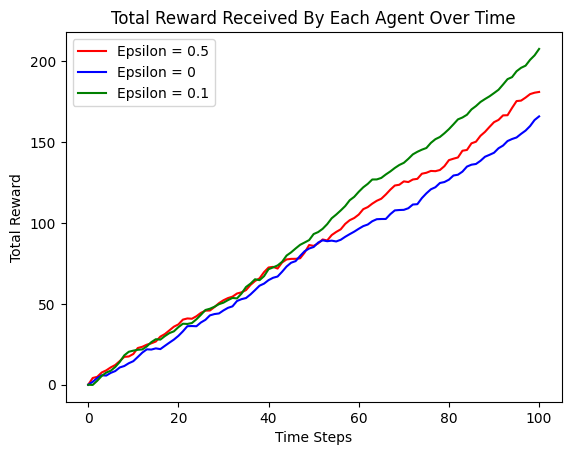

In [28]:
import matplotlib.pyplot as plt

plt.plot(time_steps, agent_05._cumulative_reward, c='red', label='Epsilon = 0.5')
plt.plot(time_steps, agent._cumulative_reward, c='blue', label='Epsilon = 0')
plt.plot(time_steps, agent_01._cumulative_reward, c='green', label='Epsilon = 0.1')
plt.xlabel("Time Steps")
plt.ylabel("Total Reward")
plt.title("Total Reward Received By Each Agent Over Time")
plt.legend()
plt.show()

As we can see, allowing the $\text{Agent}$ to explore can enable it to find superior actions to maximise its long-term reward.

## Review
We have learned some of the fundamental concepts in reinforcement learning: 
- **Agent**: a reward-maximising entity that takes actions to collect rewards.
- **Action**: a decision made by the agent and determines the next reward received. The action $a$ is sampled from the action space $\mathcal{A}$, which is the set of all available actions. 
- **Reward**: a numeric signal given to an agent after taking an action.
- **Action-Value Function**: the expected reward given to the agent after taking an action, denoted by $q(a)=\mathbb{E}[R|A=a]$. 
- **Exploitation**: selecting the action with the highest expected reward/action value. 
- **Exploration**: randomly selecting an action from the action space with probability $\epsilon$. 
- **Greedy**: always selecting the action with the highest expected reward/action value. 
- **$\epsilon$-greedy**: selecting the action with the highest expected reward/action value with probability $1-\epsilon$, and a random action with probability $\epsilon$. 

# Next ... 
So far, we have explored how an agent selects actions to maximise rewards and how it uses those rewards to determine the best actions. However, we have not yet considered a crucial factor: how actions influence the environment and the agent's position within it. 

Imagine navigating a maze with multiple paths to the exit. Starting in position 1, the best action may be to move up into position 2. If we continue to use this single 'optimal' action, we're going to run into a wall. Instead, at position 2, the best action might be to move right, and so on. 

This is where we introduce the concept of **state**, and how given a state we adapt the set of action-values to choose the most appropriate action. Since we have multiple paths to the exit, a given state might have more than one appropriate action that leads to success. The way action-values are distributed across the action space in each state is known as the **policy**. 

Next, we'll introduce the concepts of **state** and **policy**, and how the agent can learn to navigate more complex environments effectively. 